In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/image_recongnition_cnn_cifar')



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from models.deeper_cnn import DeepCNN
from utils.train_eval import train_eval_model
from utils.plot_metric import plot_metric
import numpy as np

In [4]:
model = DeepCNN(
    img_size=64,
    in_chans=3,
    out_chans1=64,
    out_chans2=128,
    kernal_size=4,
    pool_size=2,
    hidden_units=128,
    num_classes=10,
    dropout=0.5
)

In [5]:
epochs = 50
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
train_losses, train_accuracies, test_losses, test_accuracies = train_eval_model(
    model,
    optimizer=optimizer,
    criterion=criterion,
    epochs=epochs,
    dataset_name='cifar10',
    img_res=64,
    batch_size=128,
    device=device
)

Epoch [1/50] - Train Loss: 2.0741 - Train Accuracy: 45.5120%
Epoch [1/50] - Test Loss: 1.9810 - Test Accuracy: 54.6500%
Epoch [2/50] - Train Loss: 1.9255 - Train Accuracy: 60.5800%
Epoch [2/50] - Test Loss: 1.8811 - Test Accuracy: 63.1000%
Epoch [3/50] - Train Loss: 1.8529 - Train Accuracy: 66.5540%
Epoch [3/50] - Test Loss: 1.8289 - Test Accuracy: 67.4000%
Epoch [4/50] - Train Loss: 1.8074 - Train Accuracy: 70.1700%
Epoch [4/50] - Test Loss: 1.7962 - Test Accuracy: 70.6000%
Epoch [5/50] - Train Loss: 1.7777 - Train Accuracy: 72.3560%
Epoch [5/50] - Test Loss: 1.7611 - Test Accuracy: 73.1000%
Epoch [6/50] - Train Loss: 1.7557 - Train Accuracy: 74.0240%
Epoch [6/50] - Test Loss: 1.7486 - Test Accuracy: 74.0800%
Epoch [7/50] - Train Loss: 1.7353 - Train Accuracy: 75.7480%
Epoch [7/50] - Test Loss: 1.7614 - Test Accuracy: 71.8600%
Epoch [8/50] - Train Loss: 1.7237 - Train Accuracy: 76.5180%
Epoch [8/50] - Test Loss: 1.7403 - Test Accuracy: 74.1000%
Epoch [9/50] - Train Loss: 1.7104 - Trai

In [7]:
train_accuracies = np.array(train_accuracies)
test_acc = np.array(test_accuracies)
epochs = np.arange(0, len(train_accuracies))

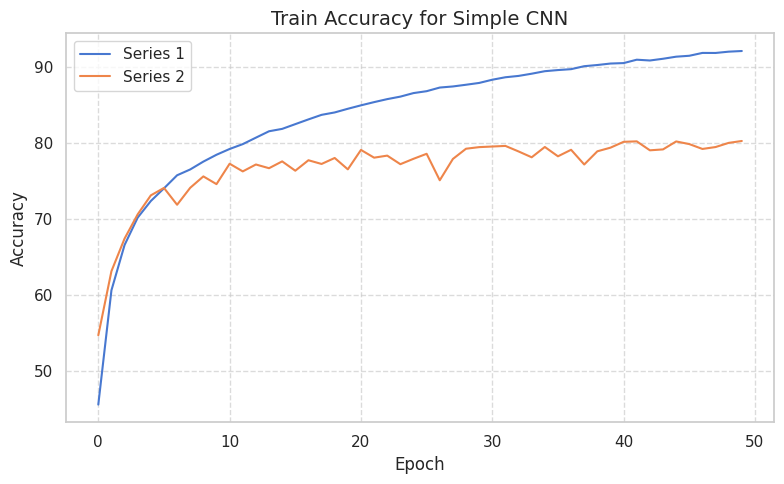

In [8]:

plot_metric(
    x=epochs,
    y_list=[train_accuracies, test_acc],
    y_label='Accuracy',
    title='Train Accuracy for Simple CNN',
    labels=None
)